In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids

In [2]:
df=pd.read_csv('iris_dataset_2D')
X = df[["PC1", "PC2"]].values
y_true = df["label"].values

In [3]:
pip install scikit-learn-extra

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
k = 3
kmedoid = KMedoids(n_clusters=k, random_state=42)
labels = kmedoid.fit_predict(X)

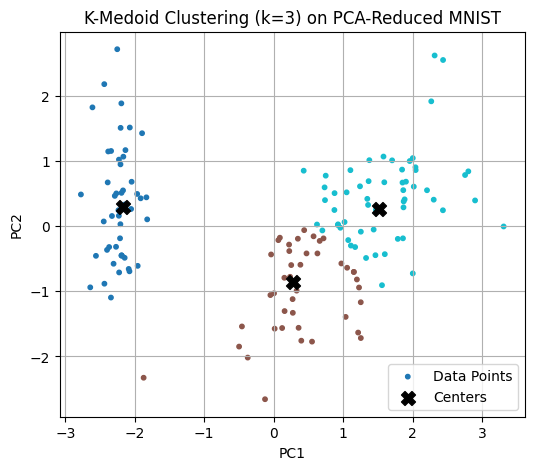

In [12]:
###C
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10, label='Data Points')
plt.scatter(kmedoid.cluster_centers_[:, 0], kmedoid.cluster_centers_[:, 1], 
            color='black', marker='X', s=100, label='Centers')
plt.title(f'K-Medoid Clustering (k={k}) on PCA-Reduced MNIST')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
##D
print(f"Inertia for : {kmedoid.inertia_:.2f}")

Inertia for : 113.95


In [34]:
import time
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3,max_iter=50,random_state=42)
kmedoids.fit(X)
kmedoids_labels = kmedoids.labels_

df['KMedoids_Label'] = kmedoids_labels
kmedoid_label_counts = df.groupby('label')['KMedoids_Label'].value_counts().unstack(fill_value=0)

for cluster,label_counts in kmedoid_label_counts.items():
    print(f"Cluster {cluster} : {label_counts}")

max_class_count_kmed = kmedoid_label_counts.max(axis=0).sum()
N = len(df)
#print(N)
print(f"\nPurity Score is {max_class_count_kmed/N}")
print(f"\n\nSum of squared distances(inertia) of samples to their closest cluster centre: {kmedoids.inertia_}")

Cluster 0 : label
0    49
1     0
2     0
Name: 0, dtype: int64
Cluster 1 : label
0     1
1    35
2     7
Name: 1, dtype: int64
Cluster 2 : label
0     0
1    15
2    43
Name: 2, dtype: int64

Purity Score is 0.8466666666666667


Sum of squared distances(inertia) of samples to their closest cluster centre: 113.94835898785479


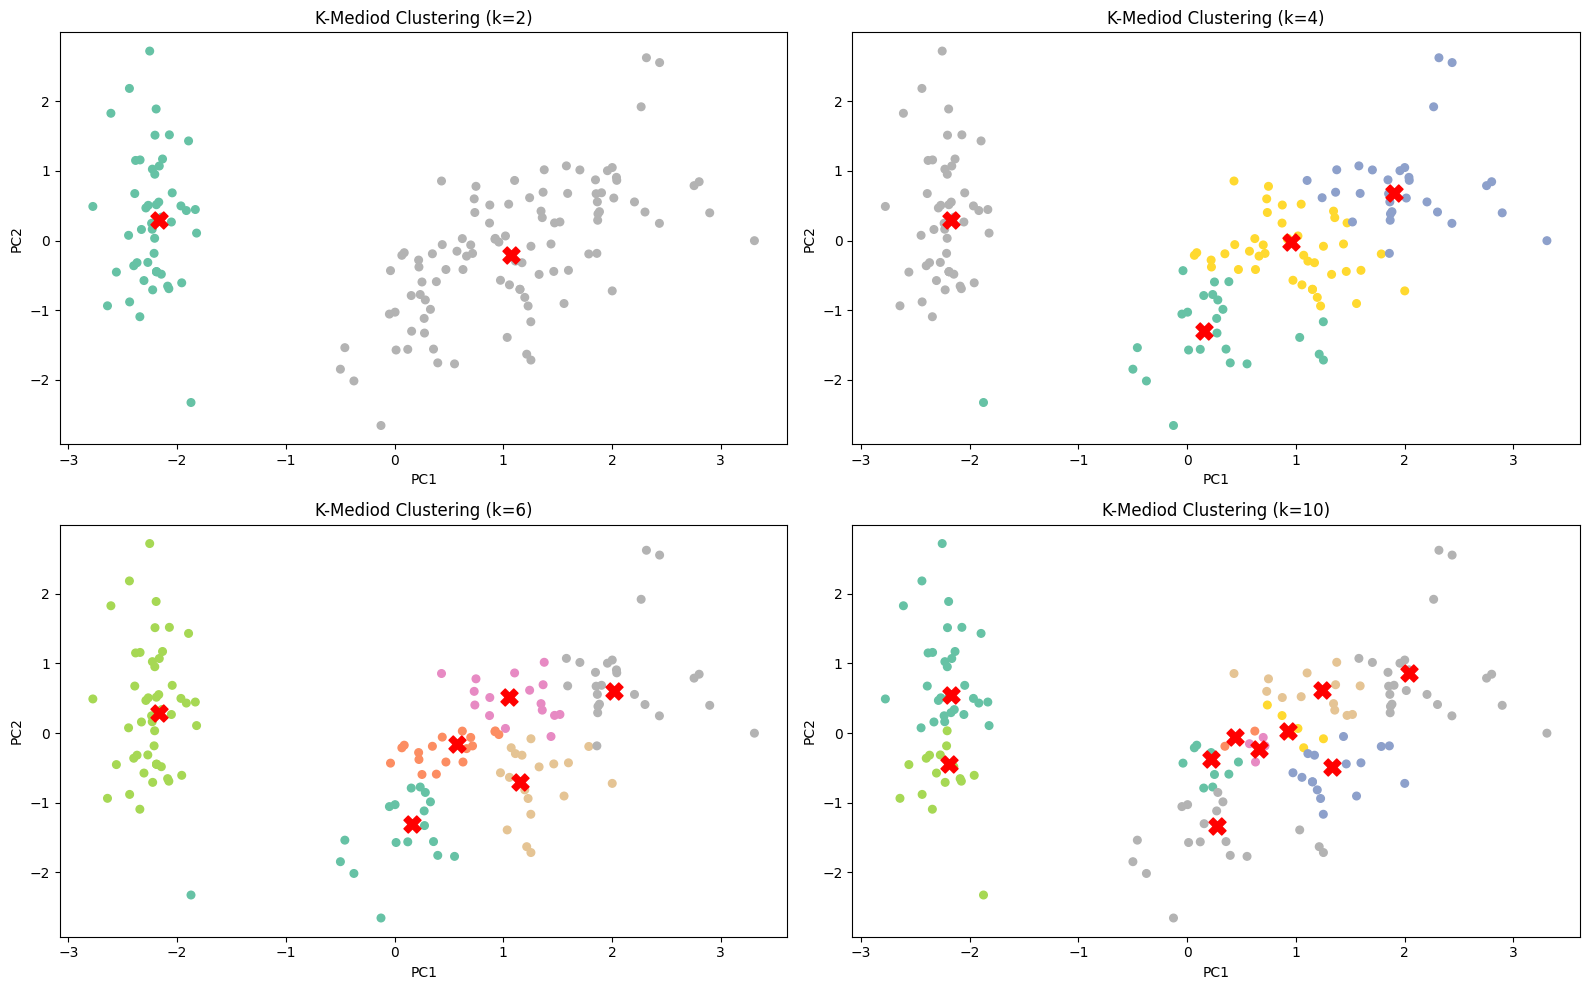

[145.60422018716565, 97.36612820633351, 84.54816358791575, 65.89876611611712]


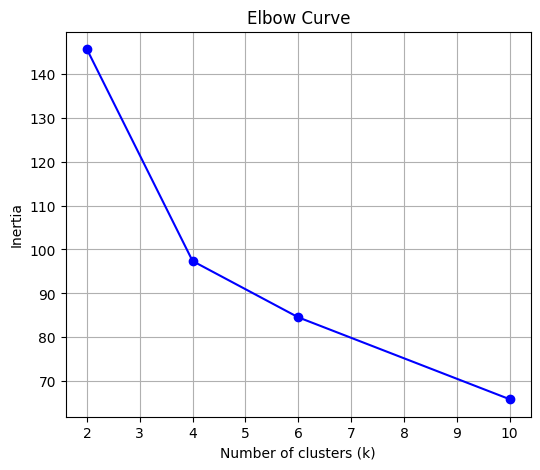

Inertia for k=4: 97.37


In [28]:
#########F
k_values = [2, 4, 6, 10]

plt.figure(figsize=(16, 10))
for i, k in enumerate(k_values, 1):
    km = KMedoids(n_clusters=k, max_iter=50, random_state=42)
    km.fit(X)
    preds = km.labels_
    centers = km.cluster_centers_
    
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=preds, cmap="Set2", s=30)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, marker='X')
    plt.title(f"K-Mediod Clustering (k={k})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

plt.tight_layout()
plt.show()

inertias = []
k_range = [2, 4, 6, 10]
for k in k_range:
     km = KMedoids(n_clusters=k, max_iter=50, random_state=42)
     km.fit(X)
     inertias.append(km.inertia_)
print(inertias)

plt.figure(figsize=(6, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.grid(True)
plt.show()

k= KMedoids(n_clusters=4, max_iter=50, random_state=42)
k.fit(X)
labels = k.labels_
print(f"Inertia for k=4: {k.inertia_:.2f}")

In [31]:
kmedoids_1 = KMedoids(n_clusters=4,max_iter=50,random_state=42)
kmedoids_1.fit(X)
kmedoids_labels_1 = kmedoids_1.labels_

df['KMedoids_Label_1'] = kmedoids_labels_1
kmedoid_label_counts_1 = df.groupby('label')['KMedoids_Label_1'].value_counts().unstack(fill_value=0)

for cluster,label_counts in kmedoid_label_counts_1.items():
    print(f"Cluster {cluster} : {label_counts}")

max_class_count_kmed_1 = kmedoid_label_counts_1.max(axis=0).sum()
N = len(df)
#print(N)
print(f"\nPurity Score is {max_class_count_kmed_1/N}")

plt.figure(figsize=(8,6))


Cluster 0 : label
0     1
1    22
2     3
Name: 0, dtype: int64
Cluster 1 : label
0     0
1     2
2    29
Name: 1, dtype: int64
Cluster 2 : label
0     0
1    26
2    18
Name: 2, dtype: int64
Cluster 3 : label
0    49
1     0
2     0
Name: 3, dtype: int64

Purity Score is 0.84


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>